Text(0.5, 1.0, 'K-Means Cluster: 3')

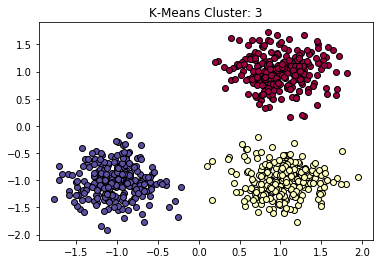

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs, make_circles, make_moons

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.3, random_state=0)
#X, labels_true = make_circles(n_samples=750, factor=.5, noise=.05)
#X, labels_true = make_moons(n_samples=750, noise=.07)                                                      

k = 3

# Compute KMeans
kmeans = KMeans(n_clusters = k).fit(X)

unique_labels = set(kmeans.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    kmeans_labels = (kmeans.labels_ == k)

    xy = X[kmeans_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('K-Means Cluster: %d' % kmeans.n_clusters)

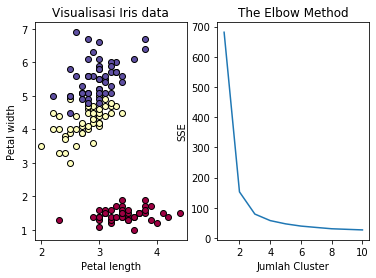

Silhouette_score kMeans : 0.3249727794370013


In [41]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = datasets.load_iris()

X = iris.data
y = iris.target

plt.subplot(1, 2, 1)
unique_labels = set(y)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (y == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 1], xy[:, 2], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('Visualisasi Iris data')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.subplot(1, 2, 2)
SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters= k).fit(X) 
    kmeans_labels = kmeans.labels_
    SSE.append(kmeans.inertia_)
    
plt.plot(range(1, 11), SSE)    
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.title('The Elbow Method')

plt.show()
print("Silhouette_score kMeans :", silhouette_score(X, kmeans_labels))

n_clusters k-Means= 2 SSE value: 152.34795176035797 Silhouette_score: 0.6810461692117462
n_clusters k-Means= 3 SSE value: 78.851441426146 Silhouette_score: 0.5528190123564095
n_clusters k-Means= 4 SSE value: 57.22847321428572 Silhouette_score: 0.49805050499728737
n_clusters k-Means= 5 SSE value: 46.44618205128204 Silhouette_score: 0.48874888709310566
n_clusters k-Means= 6 SSE value: 39.38030324250914 Silhouette_score: 0.3629552918302716
n_clusters k-Means= 7 SSE value: 34.305815295815314 Silhouette_score: 0.3542978877198849
n_clusters k-Means= 8 SSE value: 30.318268624650226 Silhouette_score: 0.34106226359205133
n_clusters k-Means= 9 SSE value: 27.846782524493065 Silhouette_score: 0.3277557373223963
n_clusters k-Means= 10 SSE value: 26.40573726661085 Silhouette_score: 0.315739544975049


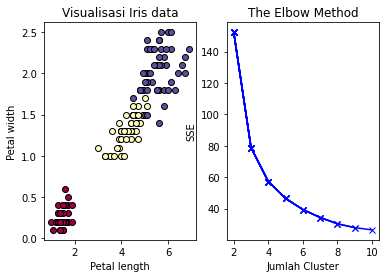

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = datasets.load_iris()

X = iris.data
y = iris.target

plt.subplot(1, 2, 1)
unique_labels = set(y)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (y == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('Visualisasi Iris data')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.subplot(1, 2, 2)
SSE = {}
K = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for k in K:
    kmeans_plus = KMeans(n_clusters=k, init='k-means++').fit(X)
    kmeansplus_labels = kmeans_plus.labels_
    SSE[k] = kmeans_plus.inertia_
    silhouette_kmeansplus = silhouette_score(X, kmeansplus_labels)
    print("n_clusters k-Means=", k,
          "SSE value:", SSE[k], "Silhouette_score:", silhouette_kmeansplus)

    pl.plot(list(SSE.keys()), list(SSE.values()), 'b-x')

pl.xlabel('Jumlah Cluster')
pl.ylabel('SSE')
pl.title('The Elbow Method')

pl.show()


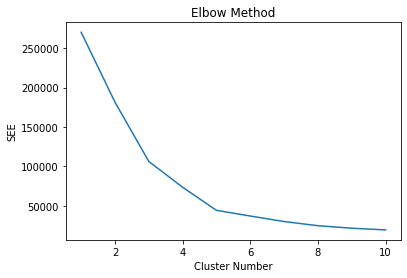

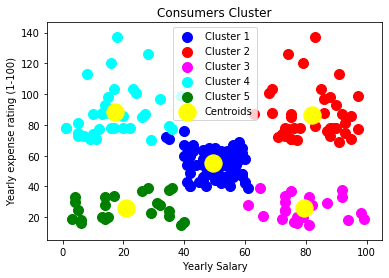

Silhouette_score kMeans : 0.553931997444648


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
# Mengimpor dataset
dataset = pd.read_csv('Customer.csv')
X = dataset.iloc[:, [3, 4]].values
 
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
SSE = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
plt.plot(range(1, 11), SSE)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('SEE')
plt.show()
 
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
 
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()
plt.show()
print("Silhouette_score kMeans :", silhouette_score(X, y_kmeans))


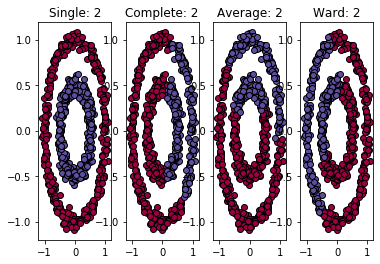

Silhouette_score Single linkage : 0.1109054036304628
Silhouette_score Complete linkage : 0.31320010572725093
Silhouette_score Average linkage : 0.3114997766663469
Silhouette_score Ward linkage : 0.31392154680851325


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs, make_circles, make_moons

centers = [[1, 1], [-1, -1], [1, -1]]
#X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.3, random_state=0)
X, labels_true = make_circles(n_samples=750, factor=.5, noise=.05)
#X, labels_true = make_moons(n_samples=750, noise=.07)                                                      

k = 2

# Compute Agglomerative
agglo_single = AgglomerativeClustering(linkage='single',n_clusters= k).fit(X)
agglo_complete = AgglomerativeClustering(linkage='complete',n_clusters= k).fit(X)
agglo_avg = AgglomerativeClustering(linkage='average',n_clusters= k).fit(X)
agglo_ward = AgglomerativeClustering(linkage='ward',n_clusters= k).fit(X)

plt.subplot(1, 4, 1)

unique_labels = set(agglo_single.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    agglo_single_labels = (agglo_single.labels_ == k)

    xy = X[agglo_single_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Single: %d' % agglo_single.n_clusters)

plt.subplot(1, 4, 2)

unique_labels = set(agglo_complete.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    agglo_complete_labels = (agglo_complete.labels_ == k)

    xy = X[agglo_complete_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Complete: %d' % agglo_complete.n_clusters)


plt.subplot(1, 4, 3)
unique_labels = set(agglo_avg.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    agglo_avg_labels = (agglo_avg.labels_ == k)

    xy = X[agglo_avg_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Average: %d' % agglo_avg.n_clusters)

plt.subplot(1, 4, 4)
unique_labels = set(agglo_ward.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    agglo_ward_labels = (agglo_ward.labels_ == k)

    xy = X[agglo_ward_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Ward: %d' % agglo_ward.n_clusters)

plt.show()
print("Silhouette_score Single linkage :", silhouette_score(X, agglo_single_labels))
print("Silhouette_score Complete linkage :", silhouette_score(X, agglo_complete_labels))
print("Silhouette_score Average linkage :", silhouette_score(X, agglo_avg_labels))
print("Silhouette_score Ward linkage :", silhouette_score(X, agglo_ward_labels))

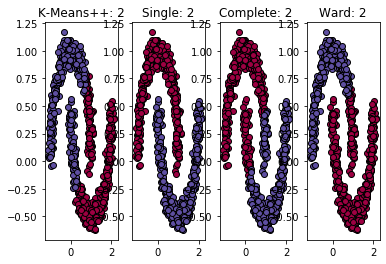

Silhouette_score k-Means++ : 0.48957843011926405
Silhouette_score Single linkage : 0.3336337411811019
Silhouette_score Complete linkage : 0.47876968903278405
Silhouette_score Ward linkage : 0.42889630326776684


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs, make_circles, make_moons

centers = [[1, 1], [-1, -1], [1, -1]]
#X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.3, random_state=0)
#X, labels_true = make_circles(n_samples=750, factor=.5, noise=.05)

X, labels_true = make_moons(n_samples=750, noise=.07)                                                      

k = 2

# Compute KMeans
kmeans = KMeans(n_clusters = k).fit(X)

# Compute KMeans++
kmeans_plus = KMeans(n_clusters = k, init = 'k-means++').fit(X)


# Compute Agglomerative
agglo_single = AgglomerativeClustering(linkage='single',n_clusters= k).fit(X)
agglo_complete = AgglomerativeClustering(linkage='complete',n_clusters= k).fit(X)
agglo_ward = AgglomerativeClustering(linkage='ward',n_clusters= k).fit(X)

plt.subplot(1, 4, 1)
unique_labels = set(kmeans_plus.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    kmeansplus_labels = (kmeans_plus.labels_ == k)

    xy = X[kmeansplus_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('K-Means++: %d' % kmeans_plus.n_clusters)

plt.subplot(1, 4, 2)

unique_labels = set(agglo_single.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    agglo_single_labels = (agglo_single.labels_ == k)

    xy = X[agglo_single_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Single: %d' % agglo_single.n_clusters)

plt.subplot(1, 4, 3)
unique_labels = set(agglo_complete.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    agglo_complete_labels = (agglo_complete.labels_ == k)

    xy = X[agglo_complete_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Complete: %d' % agglo_complete.n_clusters)

plt.subplot(1, 4, 4)
unique_labels = set(agglo_ward.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    agglo_ward_labels = (agglo_ward.labels_ == k)

    xy = X[agglo_ward_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Ward: %d' % agglo_ward.n_clusters)

plt.show()
print("Silhouette_score k-Means++ :",silhouette_score(X, kmeansplus_labels))
print("Silhouette_score Single linkage :", silhouette_score(X, agglo_single_labels))
print("Silhouette_score Complete linkage :", silhouette_score(X, agglo_complete_labels))
print("Silhouette_score Ward linkage :", silhouette_score(X, agglo_ward_labels))

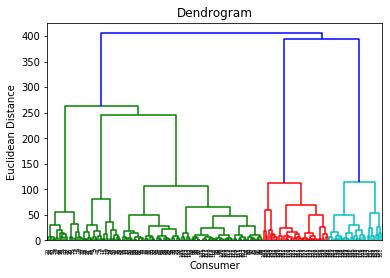

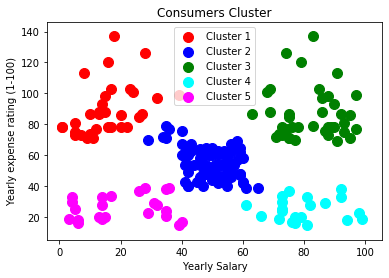

Silhouette_score kMeans : 0.5529945955148897


In [49]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
# Mengimpor dataset
dataset = pd.read_csv('Customer.csv')
X = dataset.iloc[:, [3, 4]].values
 
# Menggunakan dendrogram untuk menentukan angka cluster yang tepat
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Consumer')
plt.ylabel('Euclidean Distance')
plt.show()
 
# Menjalankan Hierarchical Clustering ke dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
 
# Visualisasi hasil clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()
plt.show()
print("Silhouette_score kMeans :", silhouette_score(X, y_hc))

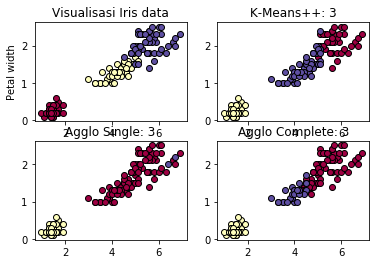

Silhouette_score k-Means++ : 0.2330888538027107
Silhouette_score Agglomerative Single : 0.2351617426090353
Silhouette_score Agglomerative Complete : -0.006477687661544955


In [57]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

iris = datasets.load_iris()

X = iris.data
y = iris.target

plt.subplot(2, 2, 1)
unique_labels = set(y)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (y == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('Visualisasi Iris data')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

kmeansplus = KMeans(n_clusters = 3, n_init=1, init = 'k-means++', max_iter=5).fit(X)

plt.subplot(2, 2, 2)
unique_labels = set(kmeansplus.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    kmeansplus_labels = (kmeansplus.labels_ == k)

    xy = X[kmeansplus_labels]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('K-Means++: %d' % kmeansplus.n_clusters)


agglo_single = AgglomerativeClustering(linkage='single',n_clusters=3).fit(X)

plt.subplot(2, 2, 3)
unique_labels = set(agglo_single.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    agglo_single_labels = (agglo_single.labels_ == k)

    xy = X[agglo_single_labels]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Agglo Single: %d' % agglo_single.n_clusters)

agglo_complete = AgglomerativeClustering(linkage='complete',n_clusters=3).fit(X)

plt.subplot(2, 2, 4)
unique_labels = set(agglo_complete.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    agglo_complete_labels = (agglo_complete.labels_ == k)

    xy = X[agglo_complete_labels]
    plt.plot(xy[:, 2], xy[:, 3], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Agglo Complete: %d' % agglo_complete.n_clusters)

plt.show()

print("Silhouette_score k-Means++ :",silhouette_score(X, kmeansplus_labels))
print("Silhouette_score Agglomerative Single :", silhouette_score(X, agglo_single_labels))
print("Silhouette_score Agglomerative Complete :", silhouette_score(X, agglo_complete_labels))